1. `Loading of data`
2. `Exploration of data`
3. `Create a model`
4. `Make prediction`
5. `Evaluation of model`
6. `Tuning the model`
7. `Save model parameters`

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Flatten, Dense

# Loading of data

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_mnist.load_data()

In [0]:
items_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [14]:
print(train_imgs.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [15]:
print(test_imgs.shape)
print(test_labels.shape)

(10000, 28, 28)
(10000,)


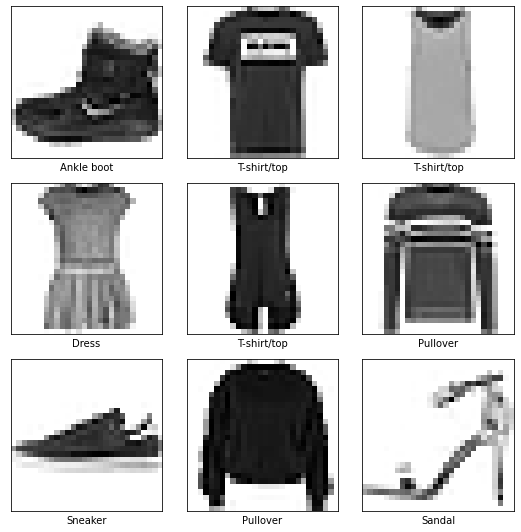

In [23]:
plt.figure(figsize=(2.5*3, 2.5*3))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(train_imgs[i], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(items_names[train_labels[i]])
plt.tight_layout()
plt.show()

In [0]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

In [0]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='relu'))

In [0]:
model.compile(optimizer='adam',
               loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics='accuracy')

In [63]:
history = model.fit(train_imgs, train_labels, epochs=5, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.9320 - accuracy: 0.7038
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8123 - accuracy: 0.7463
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7768 - accuracy: 0.7597
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7559 - accuracy: 0.7667
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7417 - accuracy: 0.7720


dict_keys(['loss', 'accuracy'])


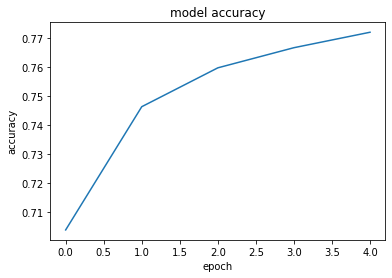

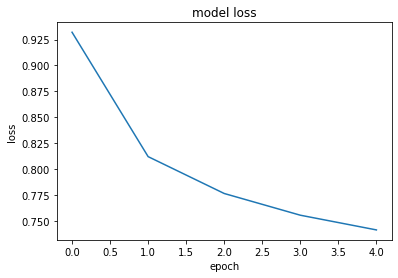

In [64]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
probability_model = keras.Sequential([model, keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_imgs)

In [0]:
def plot_img(i):
  prediction = np.argmax(predictions[i])
  true_label = test_labels[i]
  if prediction==true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.imshow(test_imgs[i], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel('{} {:.2f}% ({})'.format(
                                 items_names[prediction],
                                 np.max(predictions[i])*100,
                                 items_names[true_label]
                                 ), color=color)

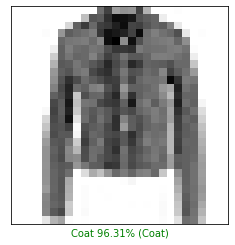

In [75]:
plot_img(10)

In [0]:
def plot_pred_val(i):
  prediction = np.argmax(predictions[i])
  true_label = test_labels[i]
  thisplot = plt.bar(x=range(10), height=predictions[i], tick_label=items_names)
  plt.xticks(rotation=90)
  plt.yticks([])
  thisplot[prediction].set_color('red')
  thisplot[true_label].set_color('green')


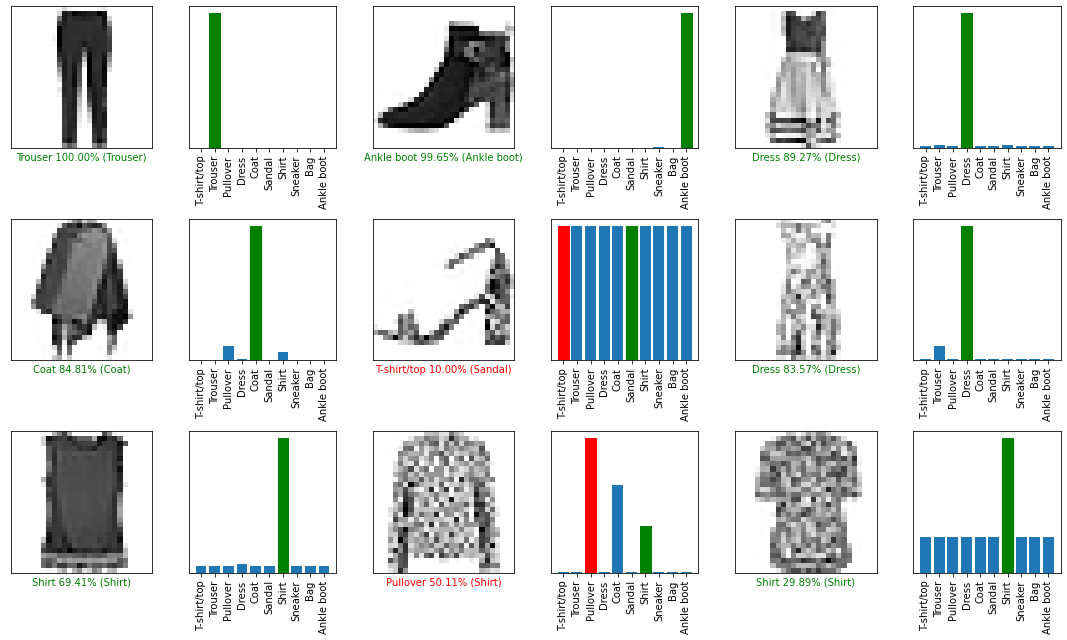

In [111]:
plt.figure(figsize=(15,9))
for i in range(9):
  plt.subplot(3, 6, 2*i+1)
  plot_img(555+i)
  plt.subplot(3, 6, 2*i+2)
  plot_pred_val(555+i)
plt.tight_layout()
plt.show()

In [107]:
np.arange(10, 20, 1)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])